# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.

**If you are using NetworkX in your assignment, you can copy this function into module03.py**

In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

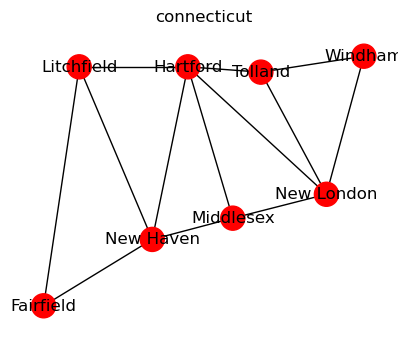

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. You can roll your own from Depth First Search or use the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You will also need to implement one of the following heuristics: **Minimum Remaining Values** or **Degree Heuristic** (tell me which one; it doesn't make sense to implement both) as well as **Least Constraining Value**. Break ties in ascending order (least to most).

You should get the backtracking and forward checking implemented first. Then add the heuristics. You can use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

    backtracking: Yes
    forward checking: Yes
    minimum remaining values: Yes
    degree heuristic: No
    least contraining value: Yes

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`. 

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement). For example, if your program starts to backtrack, the trace should say that it has to backtrack and why.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

### Set up functions
To facilitate the troubeshooting on the functions, I have created a series of functions that make the problem more readable from a human perspective:
1. `translate_edges(csp)` converts the edges into a new entry into the csp with the edges in names instead of numbers.
2. `create_domains(csp, colors)` create two entries in the csp, one is the 'domain' which considers the original colors available to each node, and `current_domains` correspond to the domains evaluated in that particular iteration of the csp.
3. `create_neighbors(csp)` creates two entries into the csp, 'neighbors' provides all of the neighbors of a particular variable as defined in the edges, and forward neighbors only provide those neighbors at the head of an arc. 

In [5]:
conn2= deepcopy(connecticut)

In [6]:
def translate_edges(csp):
    nodes = csp['nodes']
    edges = csp['edges']
    translated_edges = []
    for i in edges:
        translated_edges.append((nodes[i[0]],nodes[i[1]]))
    csp['translated_edges'] = translated_edges

In [7]:
translate_edges(conn2) 
assert conn2['translated_edges'] == [('Fairfield', 'Litchfield'),
 ('Fairfield', 'New Haven'),
 ('Litchfield', 'New Haven'),
 ('Litchfield', 'Hartford'),
 ('New Haven', 'Hartford'),
 ('New Haven', 'Middlesex'),
 ('Hartford', 'Middlesex'),
 ('Hartford', 'Tolland'),
 ('Hartford', 'New London'),
 ('Middlesex', 'New London'),
 ('Tolland', 'New London'),
 ('Tolland', 'Windham'),
 ('New London', 'Windham')]

In [8]:
def create_domains(csp, colors):
    csp['domains'] = {}
    for i in csp['nodes']:
        csp['domains'][i] = colors 
    csp['current_domains'] = deepcopy(csp['domains'])

In [9]:
create_domains(conn2, ["red", "blue", "green", "yellow"])
# check that all nodes have a correct initial domain
for i in conn2['nodes']:
    assert conn2['domains'][i] == ["red", "blue", "green", "yellow"]

In [10]:
def create_neighbors(csp):
    csp['neighbors'] = {}
    csp['forward_neighbors'] = {}
    for var in csp['nodes']:
        csp['neighbors'][var] = [neighbor[1] for neighbor in csp['translated_edges'] if neighbor[0]==var]
        csp['forward_neighbors'][var] = deepcopy(csp['neighbors'][var])
        csp['neighbors'][var] += [neighbor[0] for neighbor in csp['translated_edges'] if neighbor[1]==var]
    

In [11]:
create_neighbors(conn2)
assert conn2['neighbors']['Hartford'] == ['Middlesex', 'Tolland', 'New London', 'Litchfield', 'New Haven']
assert conn2['neighbors']['Fairfield'] == ['Litchfield', 'New Haven']

### Minimum Constraint Variable
The function `minimum_constraint_variable(csp, assignment)` returns the unnassigned variable with either the highest number of neighbors (most constraints), whenever there is a tie then it unbreaks it by using the variable with the least number of domains remaining (Degree Heuristics). If there is still a tie, it will use descending alphabetic sorting. The function takes advantage of the `list.sort()` method while passing a lambda function.

In [12]:
def minimum_constraint_variable(csp, assignment):
    assigned_variables = assignment.keys()
    unnassigned = [var for var in csp['nodes'] if var not in assigned_variables]
    unnassigned.sort(reverse=True, key=lambda x: (len(csp['neighbors'][x]), -len(csp['domains'][x])))
    return unnassigned[0]

In [13]:
# under no assignment, Hartford has 5 neighbors
assert minimum_constraint_variable(conn2, {}) == 'Hartford'
# while assigning Hartford, the second with most neighbors is New Haven with 4
assert minimum_constraint_variable(conn2, {'Hartford':'red'}) == 'New Haven' 

### Forward Checking
The function `forward_check(csp, variable, value, assignment)` considers `variable` and checks weather the following neighbors contain `value` within their corresponding domains. In case that `value` is part of the neighbors' domains, they are pruned from their corresponding domains. `assignment` is used to check is the neighbor in question has already been assigned, in which case the function does nothing. 

In [14]:
def forward_check(csp, variable, value, assignment):
    neighbors = csp['neighbors'][variable]
    for neighbor in neighbors:
        if neighbor not in assignment:
            for neighbor_value in csp['current_domains'][neighbor]: 
                if value == neighbor_value:
                    csp['current_domains'][neighbor] = [x for x in csp['current_domains'][neighbor] if x != value]                              

In [15]:
forward_check(conn2, 'Hartford', 'red', [])
# check that Hartford's neighbors have 'red' removed as part of the forward check
assert conn2['current_domains']['Middlesex'] == ['blue', 'green', 'yellow']
assert conn2['current_domains']['Tolland'] == ['blue', 'green', 'yellow']
assert conn2['current_domains']['New London'] == ['blue', 'green', 'yellow']
# now check that checking Tolland and Blue, would remove blue from New London
forward_check(conn2, 'Tolland', 'blue', [])
assert conn2['current_domains']['New London'] == ['green', 'yellow']
# check that other nodes were not modified 
assert conn2['current_domains']['Fairfield'] == ['red', 'blue', 'green', 'yellow']

### Least Constrained Value
In order to implement Least Constrained Value, the function `least_constrained_value(csp, variable)` has been created. The function `least_constrained_value(csp, variable)` checks for the values for the domain values of `variable` and looks for its forward neighbors. Then it counts the number of occurences of the value in question in a dictionary. This dictionary is then sorted in ascending order. The value with the least number of ocurrences in the forward neighbors' domains shows up first. In the case of ties, the order is given by ['red', 'blue', 'green', 'yellow'].

In [16]:
def least_constrained_value(csp, variable):
    domain = csp['current_domains'][variable]
    neighbors = csp['forward_neighbors'][variable]
    ordered_domain = {}
    for value in domain:
        count = 0
        for neighbor in neighbors:
            if value in csp['current_domains'][neighbor]:
                count += 1
        ordered_domain[value] = count
    ordered_domain = dict(sorted(ordered_domain.items(), key=lambda item: item[1]))
    return list(ordered_domain.keys())    

In [17]:
# from above we see that Tolland will have least constraints on blue
assert least_constrained_value(conn2, 'Tolland') == ['blue', 'green', 'yellow']
# from above we also see that 
assert least_constrained_value(conn2, 'Hartford') == ['red', 'green', 'yellow']
# for New London, both values have the same level of constraints, the order is given by the order of the colors given in the
# definition.
assert least_constrained_value(conn2, 'New London') == ['green', 'yellow']

### Number of conflicts
`number_conflicts(csp, variable, value, assignment)` is a helper function to identify conflicts when going through the algorithm. A conflict arises whenever a variable is assigned a value which at least one of its neighbors is assigned to. Inside the function we loop through the neighbors of the variable and count those conflicts. This conflicst variable becomes very important in the `backtrack(csp, assignment, trace=False)` function below.

In [18]:
def number_conflicts(csp, variable, value, assignment):
    def conflict(variable2):
        value2 = assignment.get(variable2, None)
        return value2 != None and not value != value2
    
    conflicts = 0
    for variable2 in csp['neighbors'][variable]:
        conflicts += 1 if conflict(variable2) else 0     
        
    return conflicts

In [19]:
assert number_conflicts(conn2, 'Hartford', 'red', {'Tolland':'red'}) == 1
assert number_conflicts(conn2, 'Hartford', 'red', {'Tolland':'blue'}) == 0

### Unassigning values
The unassing operation is akin to backtracking. The function `unassign(csp, variable, assignment)` provides this operation by resetting the current domain of the variable currently under assignment. It also removes the variable passed as parameter from the assignment.

In [20]:
def unassign(csp, variable, assignment):
    if variable in assignment.keys():
        if csp['current_domains']:
            csp['current_domains'] = deepcopy(csp['domains'])
        del assignment[variable]

In [21]:
conn2['current_domains']['New London']
# from above we see that 'New London' has the current domain of ['green', 'yellow'], after the operation the domain should go
# back to its original value ['red', 'blue', 'green', 'yellow']
unassign(conn2, 'New London', {'New London':'red'})
assert conn2['current_domains']['New London'] == ['red', 'blue', 'green', 'yellow']

## Bactracking Search and Backtrack
These two functions represent the implementation of the functions present in AIMA page 192 as suggested above. The algorithm is modeled on the recursive depth-first search of Chapter 3. Note tha the functions use `minimum_constraint_variable(csp, assignment)` instead of SELECT-UNASSIGNED-VARIABLE and `least_constrained_value(csp, variable)` instead of ORDER-DOMAIN-VALUES in the textbook. Also, INFERENCE is replaced by `forward_check(csp, variable, value, assignment)`.

In [22]:
def backtracking_search(csp, trace=False):
    return backtrack(csp,{},trace)

def backtrack(csp, assignment, trace=False):
    if len(assignment) == len(csp['nodes']):
        return assignment
    variable = minimum_constraint_variable(csp, assignment)
    current_neighbors = csp['forward_neighbors'][variable]
    if trace:
        print(f"\nConsidering the variable:{variable}")
    for value in least_constrained_value(csp, variable):
        if trace:
            print(f"\tConsidering the value:{value}")        
        conflicts = number_conflicts(csp, variable,value,assignment)
        if  conflicts == 0:
            assignment[variable] = value 
            forward_check(csp, variable, value, assignment)
            if trace:
                print(f"\tCurrent Assignment:{assignment}")
            result = backtrack(csp, assignment, trace)            
            if result is not None:
                return result
        if trace:
            print(f"\t\t{conflicts} conflict(s) found, Backtracking")
        unassign(csp, variable, assignment)          
    return None        

## Color Map
The `color_map(planar_map, color_list, trace=False)` function below implements the entire algorithm. It makes use of all of the functions defined and tested above. Each function provides a unique operation. In order to make the result compliant to the assignment, the last few lines of the function return the assignment in the order of the nodes provided and encapsulated in tuples instead of a dictionary as implemented in `backtracking_search(csp, trace=False)`.

In [23]:
def color_map(planar_map, color_list, trace=False):
    csp = deepcopy(planar_map)
    translate_edges(csp)
    create_neighbors(csp)
    create_domains(csp, color_list)
    assignment = backtracking_search(csp, trace)
    ordered_assignment = []
    for node in csp['nodes']:
        ordered_assignment.append((node, assignment[node]))
    return ordered_assignment

Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Problem 1. Color Connecticut Using Your Solution

In [24]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=False)

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

In [25]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

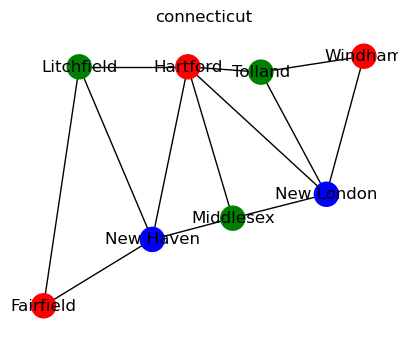

In [26]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)


Considering the variable:Hartford
	Considering the value:red
	Current Assignment:{'Hartford': 'red'}

Considering the variable:New Haven
	Considering the value:blue
	Current Assignment:{'Hartford': 'red', 'New Haven': 'blue'}

Considering the variable:New London
	Considering the value:blue
	Current Assignment:{'Hartford': 'red', 'New Haven': 'blue', 'New London': 'blue'}

Considering the variable:Litchfield
	Considering the value:green
	Current Assignment:{'Hartford': 'red', 'New Haven': 'blue', 'New London': 'blue', 'Litchfield': 'green'}

Considering the variable:Middlesex
	Considering the value:green
	Current Assignment:{'Hartford': 'red', 'New Haven': 'blue', 'New London': 'blue', 'Litchfield': 'green', 'Middlesex': 'green'}

Considering the variable:Tolland
	Considering the value:green
	Current Assignment:{'Hartford': 'red', 'New Haven': 'blue', 'New London': 'blue', 'Litchfield': 'green', 'Middlesex': 'green', 'Tolland': 'green'}

Considering the variable:Fairfield
	Considering 

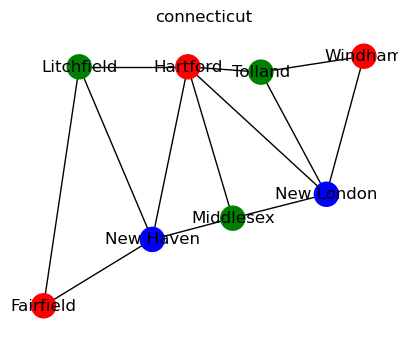

In [27]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=True)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [28]:
europe = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [29]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)


Considering the variable:Italy
	Considering the value:red
	Current Assignment:{'Italy': 'red'}

Considering the variable:Germany
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red'}

Considering the variable:Poland
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue'}

Considering the variable:Austria
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'blue'}

Considering the variable:Serbia
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'blue', 'Serbia': 'red'}

Considering the variable:Russia
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'blue', 'Serbia': 'red', 'Russia': 'red'}

Considering the variable:France
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 

Here we're testing to see if the adjacent nodes are colored differently:

In [30]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

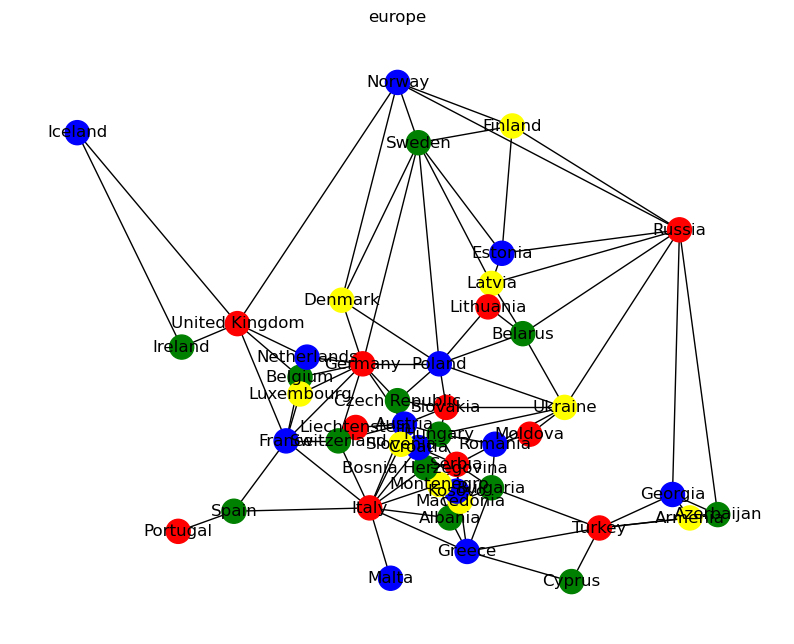

In [31]:
draw_map("europe", europe, (10,8), europe_colors)

In [32]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=True)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)


Considering the variable:Italy
	Considering the value:red
	Current Assignment:{'Italy': 'red'}

Considering the variable:Germany
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red'}

Considering the variable:Poland
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue'}

Considering the variable:Austria
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'blue'}

Considering the variable:Serbia
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'blue', 'Serbia': 'red'}

Considering the variable:Russia
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'blue', 'Serbia': 'red', 'Russia': 'red'}

Considering the variable:France
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 

	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:blue
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:green
		2 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:green
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'green', 'Serbia': 'green', 'Russia': 'red', 'France': 'green', 'Sweden': 'green', 'Hungary': 'blue', 'Ukraine': 'green', 'United Kingdom': 'red', 'Greece': 'green'}

Conside

	Considering the value:green
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'red', 'France': 'blue', 'Sweden': 'green', 'Hungary': 'red', 'Ukraine': 'green', 'United Kingdom': 'red', 'Greece': 'green'}

Considering the variable:Turkey
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'red', 'France': 'blue', 'Sweden': 'green', 'Hungary': 'red', 'Ukraine': 'green', 'United Kingdom': 'red', 'Greece': 'green', 'Turkey': 'red'}

Considering the variable:Belgium
	Considering the value:red
		2 conflict(s) found, Backtracking
	Considering the value:blue
		1 conflict(s) found, Backtracking
	Considering the value:green
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'blue', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'red', 'France': 'blue', 'Sweden': 'green', 'Hungary': 'red', 'Ukraine': 'green', 'United

		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'green', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'green', 'France': 'green', 'Sweden': 'blue', 'Hungary': 'red', 'Ukraine': 'blue', 'United Kingdom': 'red'}

Considering the variable:Greece
	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'green', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'green', 'France': 'green', 'Sweden': 'blue', 'Hungary': 'red', 'Ukraine': 'blue', 'United Kingdom': 'red', 'Greece': 'blue'}

Considering the variable:Turkey
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'green', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'green', 'France': 'green', 'Sweden': 'blue', 'Hungary': 'red', 'Ukraine': 'blue'

	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'green', 'Austria': 'blue', 'Serbia': 'red', 'Russia': 'green', 'France': 'blue', 'Sweden': 'blue', 'Hungary': 'green', 'Ukraine': 'blue', 'United Kingdom': 'red', 'Greece': 'blue', 'Turkey': 'green', 'Belgium': 'green'}

Considering the variable:Norway
	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
		1 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:green
	Current Assignment:{'Italy': 'red', 'Germany': 'red', 'Poland': 'green', 'Austria': 'blue', 'Serbia': 'red', 'Russia': 'green', 'France': 'blue', 'Sweden': 'blue', 'Hungary': 'green', 'Ukraine': 'blue', 'United Kingdom': 'red', 'Greece': 'green'}

Considering the variable:Turkey
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'German

	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
		1 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:blue
		2 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'blue', 'Poland': 'green', 'Austria': 'green', 'Serbia': 'green', 'Russia': 'green', 'France': 'green', 'Sweden': 'red', 'Hungary': 'blue', 'Ukraine': 'red', 'United Kingdom': 'blue', 'Greece': 'green', 'Turkey': 'blue'}

Considering the variable:Belgium
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'blue', 'Poland': 'green', 'Austria': 'green', 'Serbia': 'green', 'Russia': 'green', 'France': 'green', 'Sweden': 'red', 'Hungary': 'blue', 'Ukraine': 'red', 'United Kingdom': 'blue', 'Greece': 'green'

	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
	Current Assignment:{'Italy': 'red', 'Germany': 'green', 'Poland': 'blue', 'Austria': 'blue', 'Serbia': 'red', 'Russia': 'blue', 'France': 'blue', 'Sweden': 'red', 'Hungary': 'green', 'Ukraine': 'red', 'United Kingdom': 'green', 'Greece': 'blue'}

Considering the variable:Turkey
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'green', 'Poland': 'blue', 'Austria': 'blue', 'Serbia': 'red', 'Russia': 'blue', 'France': 'blue', 'Sweden': 'red', 'Hungary': 'green', 'Ukraine': 'red', 'United Kingdom': 'green', 'Greece': 'blue', 'Turkey': 'red'}

Considering the variable:Belgium
	Considering the value:red
	Current Assignment:{'Italy': 'red', 'Germany': 'green', 'Poland': 'blue', 'Austria': 'blue', 'Serbia': 'red', 'Russia': 'blue', 'France': 'blue', 'Sweden': 'red', 'Hungary': 'green', 'Ukraine': 'red', 'United Kingdom': 'green', 'Greece': 'blue', 'Turkey': 'red', 'Belgium': 'r

		0 conflict(s) found, Backtracking
	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:blue
		2 conflict(s) found, Backtracking
	Considering the value:green
	Current Assignment:{'Italy': 'blue', 'Germany': 'blue', 'Poland': 'red', 'Austria': 'red', 'Serbia': 'green', 'Russia': 'blue', 'France': 'green'}

Considering the variable:Sweden
	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
		1 conflict(s) found, Backtracking
	Considering the value:green
	Current Assignment:{'Italy': 'blue', 'Germany': 'blue', 'Poland': 'red', 'Austria': 'red', 'Serbia': 'green', 'Russia': 'blue', 'France': 'green', 'Sweden': 'green'}

Considering the variable:Hungary
	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
	Current Assignment:{'Italy': 'blue', 'Ger

	Considering the value:green
	Current Assignment:{'Italy': 'blue', 'Germany': 'blue', 'Poland': 'red', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'red', 'France': 'green', 'Sweden': 'green', 'Hungary': 'red', 'Ukraine': 'green', 'United Kingdom': 'red', 'Greece': 'red', 'Turkey': 'green'}

Considering the variable:Belgium
	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
		1 conflict(s) found, Backtracking
	Considering the value:green
		1 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:blue
		1 conflict(s) found, Backtracking
	Considering the value:green
	Current Assignment:{'Italy': 'blue', 'Germany': 'blue', 'Poland': 'red', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'red', 'France': 'green', 'Sweden': 'green', 'Hungary': 'red', 'Ukraine': 'green', 'United Kingdom': 'red', 'Greece': 'green'}

Considering the variable:Turkey
	Considering the value:red
	Curr

		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
		0 conflict(s) found, Backtracking
	Considering the value:blue
	Current Assignment:{'Italy': 'blue', 'Germany': 'blue', 'Poland': 'green', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'red', 'France': 'red', 'Sweden': 'red', 'Hungary': 'red', 'Ukraine': 'blue', 'United Kingdom': 'blue', 'Greece': 'green', 'Turkey': 'blue'}

Considering the variable:Belgium
	Considering the value:red
		1 conflict(s) found, Backtracking
	Considering the value:blue
		2 conflict(s) found, Backtracking
	Considering the value:green
	Current Assignment:{'Italy': 'blue', 'Germany': 'blue', 'Poland': 'green', 'Austria': 'green', 'Serbia': 'blue', 'Russia': 'red', 'France': 'red', 'Sweden': 'red', 'Hungary': 'red', 'Ukraine': 'blue', 'United Kingdom': 'blue', 'Greece': 'green', 'Turkey': 'blue', 'Belgium': 'green'}

Considering the variable:Norway
	Considering the value:red
		2 conflict(s) found, Backt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



TypeError: 'NoneType' object is not subscriptable

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.